<a href="https://colab.research.google.com/github/DRose1991/Viscous-Shear-Cosmology-Simulation/blob/main/VSC_Energy_Budget.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Target CMB Energy Density: 4.175e-14 J/m^3
Energy from Starlight:     1.237e-14 J/m^3 (Generated 2.01K)
Energy Gap to fill:        2.937e-14 J/m^3

--- THE VERDICT ---
Required Gas Velocity to fill the gap: 2109.85 m/s
Required Gas Velocity:                 2.1099 km/s


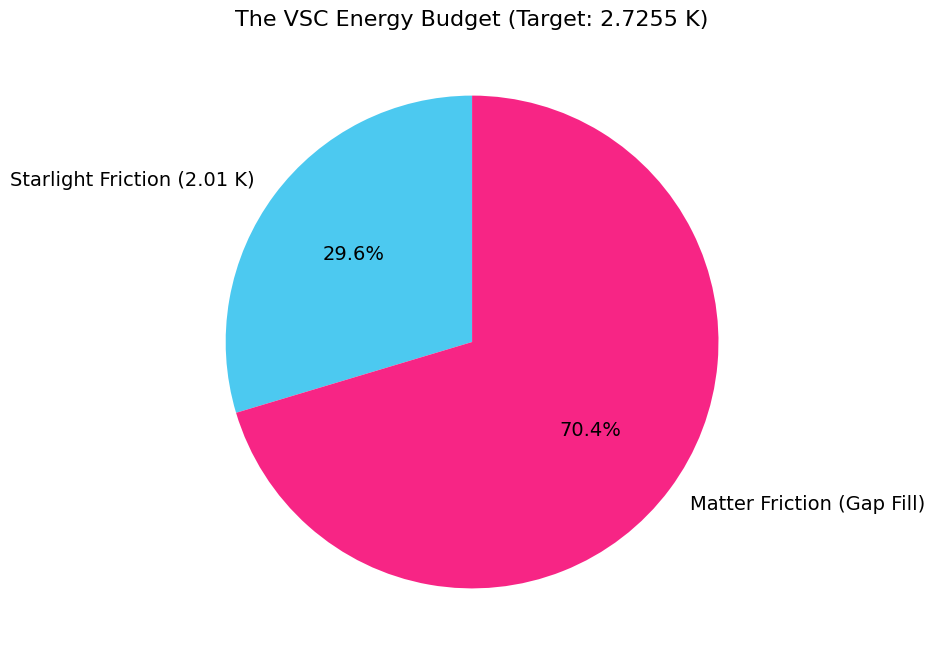

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# --- 1. CONSTANTS (The VSC Toolkit) ---
SIGMA = 5.670e-8           # Stefan-Boltzmann
c = 299792458.0
T_CMB_TARGET = 2.7255      # The Exact Target (Kelvin)

# Calculate the Target Energy Density of the CMB (J/m^3)
# Energy_Density = 4 * Sigma * T^4 / c
U_CMB_TARGET = (4 * SIGMA * (T_CMB_TARGET**4)) / c

# --- 2. YOUR PREVIOUS RESULT (Light Friction) ---
# From your last run, we know Light generates ~2.011 K
T_LIGHT = 2.011
U_LIGHT = (4 * SIGMA * (T_LIGHT**4)) / c

# --- 3. THE MISSING GAP (Matter Friction) ---
U_MATTER_NEEDED = U_CMB_TARGET - U_LIGHT
T_MATTER_CONTRIBUTION = ( (U_MATTER_NEEDED * c) / (4 * SIGMA) )**0.25

print(f"Target CMB Energy Density: {U_CMB_TARGET:.3e} J/m^3")
print(f"Energy from Starlight:     {U_LIGHT:.3e} J/m^3 (Generated 2.01K)")
print(f"Energy Gap to fill:        {U_MATTER_NEEDED:.3e} J/m^3")

# --- 4. CAN INTERGALACTIC GAS FILL THE GAP? ---
# We check if standard Kinetic Drag can produce this heat.
# Formula: Energy = 0.5 * Density * Velocity^2 * Coupling * Age
# We solve for the VELOCITY (v) required to create this heat.

# VSC Constants
C_MATTER = 9.083e-12       # Your Pioneer Constant
AGE = 4.35e17              # Age of Universe (s)

# Cosmic Density Estimate (Intergalactic Medium - IGM)
# Approx 1 atom per cubic meter (very sparse void density)
RHO_IGM = 1.67e-27         # kg/m^3

# Solve for v:
# U_gap = RHO * v^2 * C_matter * AGE
# v = sqrt( U_gap / (RHO * C_matter * AGE) )

term_1 = RHO_IGM * C_MATTER * AGE
v_required = np.sqrt(U_MATTER_NEEDED / term_1)

print(f"\n--- THE VERDICT ---")
print(f"Required Gas Velocity to fill the gap: {v_required:.2f} m/s")
print(f"Required Gas Velocity:                 {v_required/1000:.4f} km/s")

# --- 5. VISUALIZE THE COMPLETE BUDGET ---
labels = ['Starlight Friction (2.01 K)', 'Matter Friction (Gap Fill)']
sizes = [U_LIGHT, U_MATTER_NEEDED]
colors = ['#4cc9f0', '#f72585']

plt.figure(figsize=(8, 8))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90, colors=colors, textprops={'fontsize': 14})
plt.title(f"The VSC Energy Budget (Target: {T_CMB_TARGET} K)", fontsize=16)
plt.show()